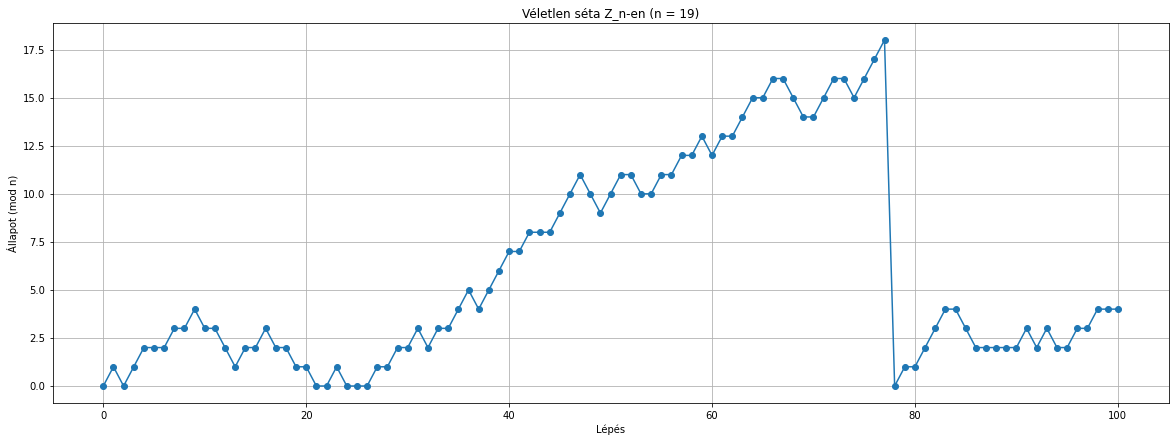

In [1]:
#Z_n-en torteno veletlen seta 

import numpy as np
import matplotlib.pyplot as plt

def simulate_single_random_walk(n, steps, start=0):
    x = start
    trajectory = [x]
    for _ in range(steps):
        epsilon = np.random.choice([-1, 0, 1])
        x = (x + epsilon) % n
        trajectory.append(x)
    return trajectory

n = 19
steps = 100
trajectory = simulate_single_random_walk(n, steps)

fig=plt.figure(figsize=(20, 7))
plt.plot(range(steps + 1), trajectory, marker='o', linestyle='-')
plt.xlabel('Lépés')
plt.ylabel('Állapot (mod n)')
plt.title(f'Véletlen séta Z_n-en (n = {n})')
plt.grid(True)
plt.savefig("single_random1.1.pdf", bbox_inches='tight')
plt.show()

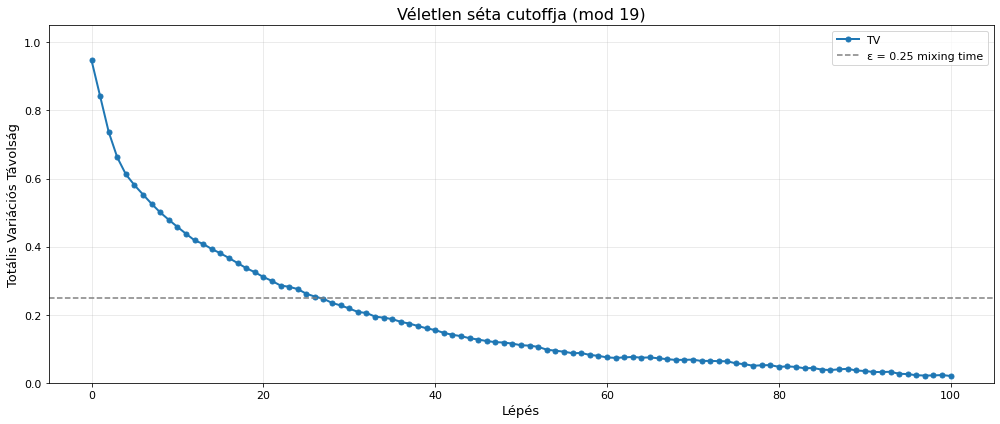

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter

def simulate_random_walk (n, steps, start=0):
    """Simulate one trajectory of the random walk on Z_n."""
    x = start
    trajectory = [x]
    for _ in range(steps):
        epsilon = np.random.choice([-1, 0, 1])
        x = (x + epsilon) % n
        trajectory.append(x)
    return trajectory

def estimate_distribution(n, steps, num_walks):
    """Estimate the distribution of the chain at each time step."""
    counts = [Counter() for _ in range(steps + 1)]
    for _ in range(num_walks):
        traj = simulate_random_walk(n, steps)
        for k, state in enumerate(traj):
            counts[k][state] += 1
            
    distributions = []
    for count in counts:
        total = sum(count.values())
        dist = np.zeros(n)
        for state, freq in count.items():
            dist[state] = freq / total
        distributions.append(dist)

    return distributions
            
def total_variation_distance(p, q):
    """Compute total variation distance between two distributions."""
    return 0.5 * np.sum(np.abs(p - q))

def analyze_cutoff(n, steps, num_walks):
    """Run the analysis and plot total variation distance over time."""
    uniform = np.ones(n) / n
    distributions = estimate_distribution(n, steps, num_walks)
    tvds = [total_variation_distance(dist, uniform) for dist in distributions]
    
    plt.figure(figsize=(14, 6))
    plt.plot(tvds, marker='o', linewidth=2, markersize=5, label='TV')
    plt.axhline(0.25, color='gray', linestyle='--', linewidth=1.5, label='ε = 0.25 mixing time')
    plt.xlabel('Lépés', fontsize=13)
    plt.ylabel('Totális Variációs Távolság', fontsize=13)
    plt.title(f'Véletlen séta cutoffja (mod {n})', fontsize=16)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.ylim(0, 1.05)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.savefig("multiple_random1.pdf", bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    analyze_cutoff(n=19, steps=100, num_walks=10000)

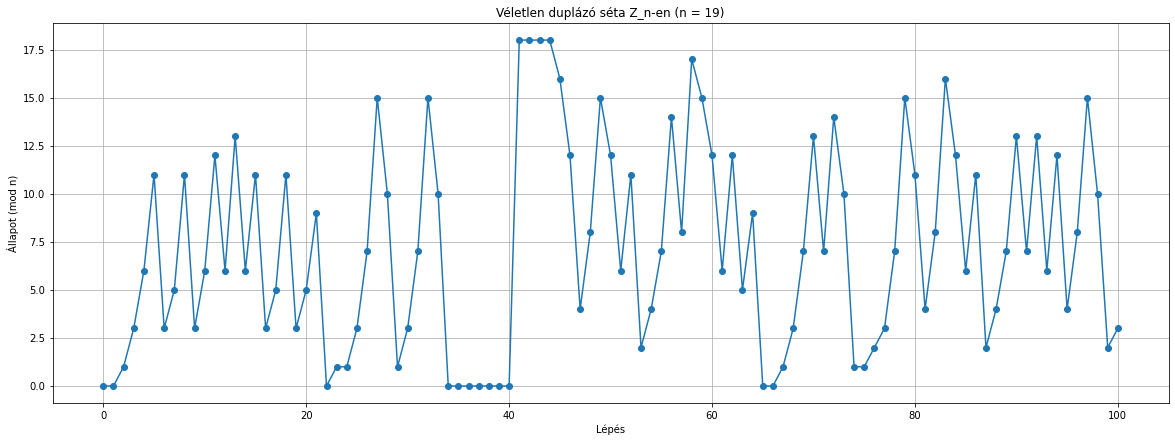

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_single_doubling_walk(n, steps, start=0):
    x = start
    trajectory = [x]
    for _ in range(steps):
        epsilon = np.random.choice([-1, 0, 1])
        x = (2 * x + epsilon) % n
        trajectory.append(x)
    return trajectory

# Parameters
n = 19
steps = 100
trajectory = simulate_single_doubling_walk(n, steps)

# Plot the trajectory
plt.figure(figsize=(20, 7))
plt.plot(range(steps + 1), trajectory, marker='o', linestyle='-')
plt.xlabel('Lépés')
plt.ylabel('Állapot (mod n)')
plt.title(f'Véletlen duplázó séta Z_n-en (n = {n})')
plt.grid(True)
plt.savefig("single_doubling_random1.pdf", bbox_inches='tight')
plt.show()

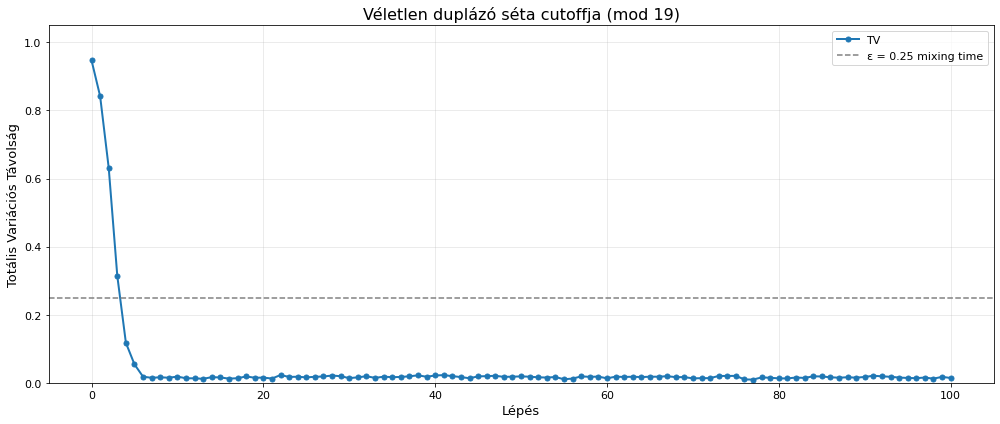

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter

def simulate_doubling_random_walk (n, steps, start=0):
    """Simulate one trajectory of the random walk on Z_n."""
    x = start
    trajectory = [x]
    for _ in range(steps):
        epsilon = np.random.choice([-1, 0, 1])
        x = (2*x + epsilon) % n
        trajectory.append(x)
    return trajectory

def estimate_distribution(n, steps, num_walks):
    """Estimate the distribution of the chain at each time step."""
    counts = [Counter() for _ in range(steps + 1)]
    for _ in range(num_walks):
        traj = simulate_doubling_random_walk(n, steps)
        for k, state in enumerate(traj):
            counts[k][state] += 1
            
    distributions = []
    for count in counts:
        total = sum(count.values())
        dist = np.zeros(n)
        for state, freq in count.items():
            dist[state] = freq / total
        distributions.append(dist)

    return distributions
            
def total_variation_distance(p, q):
    """Compute total variation distance between two distributions."""
    return 0.5 * np.sum(np.abs(p - q))


def analyze_cutoff(n, steps, num_walks):
    """Run the analysis and plot total variation distance over time."""
    uniform = np.ones(n) / n
    distributions = estimate_distribution(n, steps, num_walks)
    tvds = [total_variation_distance(dist, uniform) for dist in distributions]
    
    plt.figure(figsize=(14, 6))
    plt.plot(tvds, marker='o', linewidth=2, markersize=5, label='TV')
    plt.axhline(0.25, color='gray', linestyle='--', linewidth=1.5, label='ε = 0.25 mixing time')
    plt.xlabel('Lépés', fontsize=13)
    plt.ylabel('Totális Variációs Távolság', fontsize=13)
    plt.title(f'Véletlen duplázó séta cutoffja (mod {n})', fontsize=16)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.ylim(0, 1.05)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.savefig("multiple_doubling_random.pdf", bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    analyze_cutoff(n=19, steps=100, num_walks=10000)

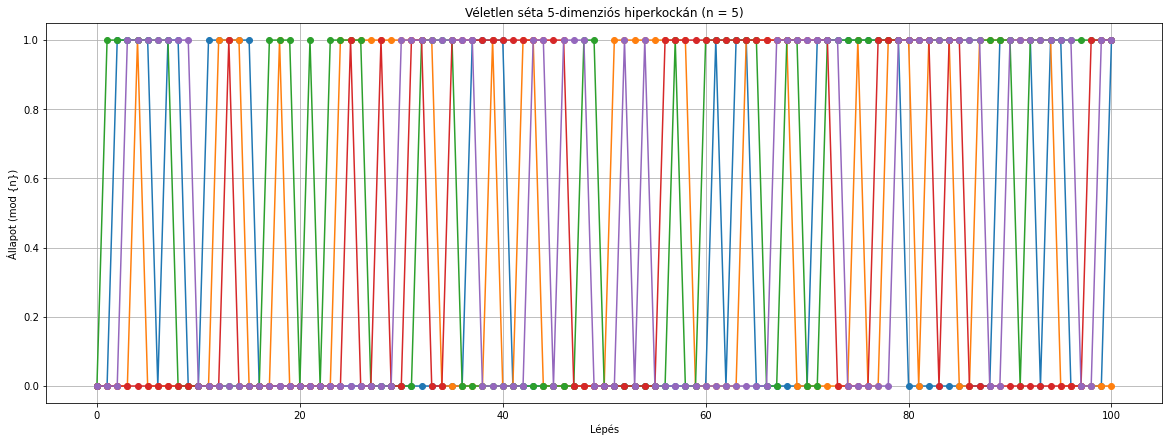

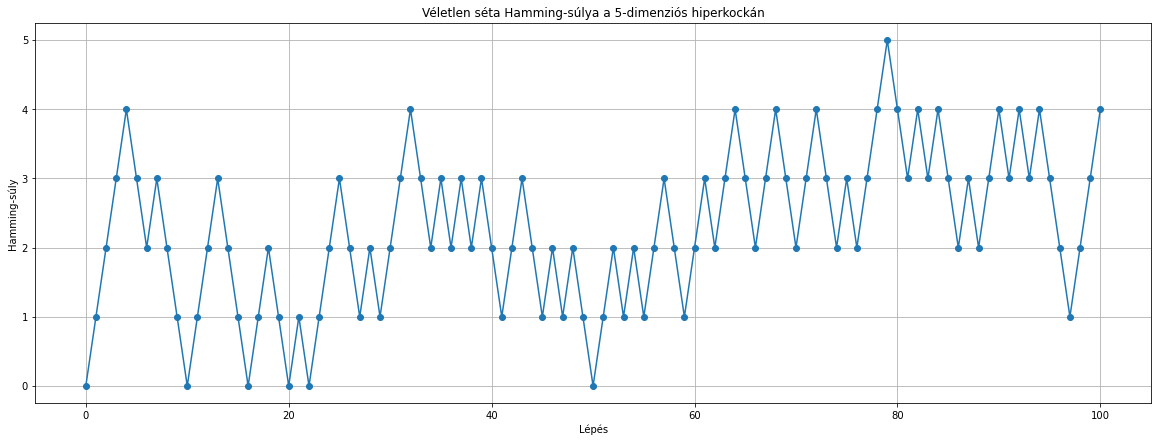

In [35]:
#hiperkockan torteno veletlen seta 

import numpy as np
import matplotlib.pyplot as plt

def simulate_single_hypercube_walk(n, steps, start=None):
    """Simulate one trajectory of a random walk on the n-dimensional hypercube."""
    if start is None:
        x = np.zeros(n, dtype=int)
    else:
        x = np.array(start, dtype=int)

    trajectory = [x.copy()]
    
    for _ in range(steps):
        i = np.random.randint(n)  
        x[i] = 1 - x[i]           
        trajectory.append(x.copy())
    return trajectory

n = 5
steps = 100
trajectory = simulate_single_hypercube_walk(n, steps)

fig=plt.figure(figsize=(20, 7))
plt.plot(range(steps + 1), trajectory, marker='o', linestyle='-')
plt.xlabel('Lépés')
plt.ylabel('Állapot (mod {n})')
plt.title(f'Véletlen séta {n}-dimenziós hiperkockán (n = {n})')
plt.grid(True)
plt.savefig("single_hypercube_walk.pdf", bbox_inches='tight')
plt.show()

hamming_weights = [np.sum(x) for x in trajectory]

fig = plt.figure(figsize=(20, 7))
plt.plot(range(steps + 1), hamming_weights, marker='o', linestyle='-')
plt.xlabel('Lépés')
plt.ylabel('Hamming-súly')
plt.title(f'Véletlen séta Hamming-súlya a {n}-dimenziós hiperkockán')
plt.grid(True)
plt.savefig("single_hypercube_walk_hamming.pdf", bbox_inches='tight')
plt.show()


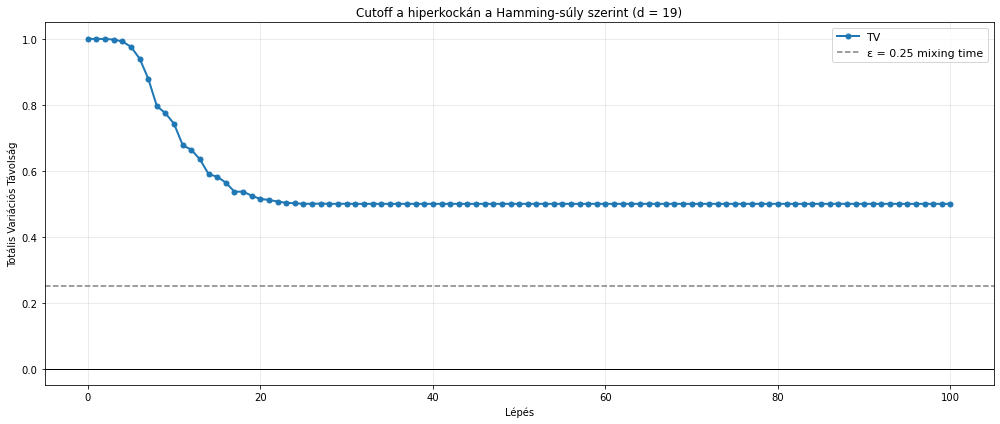

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product

def simulate_single_hypercube_walk(n, steps, start=None):
    """Simulate one trajectory of a random walk on the n-dimensional hypercube."""
    if start is None:
        x = np.zeros(n, dtype=int)
    else:
        x = np.array(start, dtype=int)

    trajectory = [x.copy()]
    
    for _ in range(steps):
        i = np.random.randint(n)
        x[i] = 1 - x[i]
        trajectory.append(x.copy())
    return trajectory

def estimate_hamming_distribution(n, steps, num_walks):
    """Estimate distribution over Hamming weights."""
    counts = [Counter() for _ in range(steps + 1)]
    for _ in range(num_walks):
        traj = simulate_single_hypercube_walk(n, steps)
        for k, state in enumerate(traj):
            weight = np.sum(state)
            counts[k][weight] += 1

    distributions = []
    for count in counts:
        dist = np.zeros(n + 1)
        for weight in range(n + 1):
            dist[weight] = count[weight] / num_walks
        distributions.append(dist)

    return distributions

def total_variation_distance(p, q):
    """Compute total variation distance between two distributions."""
    if isinstance(p, dict):
        return 0.5 * sum(abs(p[k] - q[k]) for k in p)
    else:
        return 0.5 * np.sum(np.abs(p - q))


def analyze_cutoff_hypercube_hamming(n, steps, num_walks):
    """TVD to binomial distribution over Hamming weights"""
    distributions = estimate_hamming_distribution(n, steps, num_walks)
    binomial = np.array([scipy.special.comb(n, k) / 2**n for k in range(n + 1)])
    tvds = [total_variation_distance(dist, binomial) for dist in distributions]

    plt.figure(figsize=(14, 6))
    plt.plot(tvds, marker='o', linewidth=2, markersize=5, label='TV')
    plt.axhline(0.25, color='gray', linestyle='--', linewidth=1.5, label='ε = 0.25 mixing time')
    plt.axhline(0, color='black', linestyle='-', linewidth=1)
    plt.xlabel('Lépés')
    plt.ylabel('Totális Variációs Távolság')
    plt.title(f'Cutoff a hiperkockán a Hamming-súly szerint (d = {n})')
    plt.grid(alpha=0.3)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.savefig("multiple_hypercube_walk_hamming.pdf", bbox_inches='tight')
    plt.show()

import scipy.special
analyze_cutoff_hypercube_hamming(n=19, steps=100, num_walks=10000)

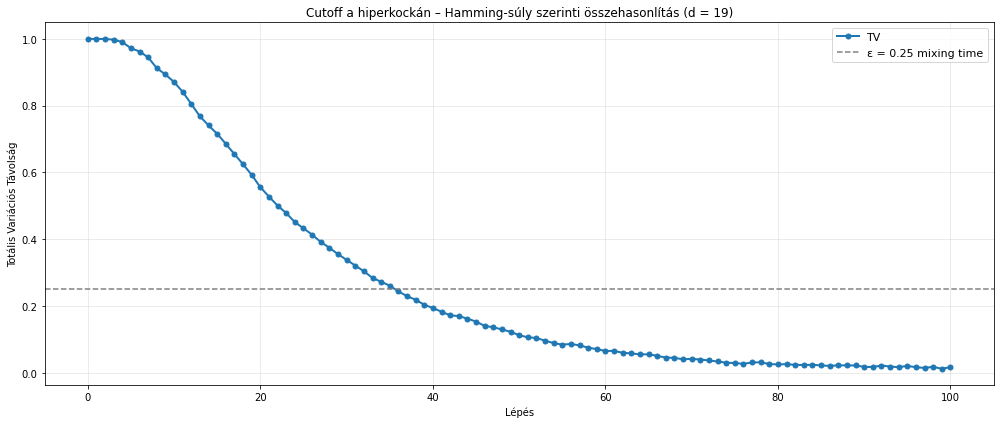

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product

def simulate_single_hypercube_walk(n, steps, start=None):
    """Simulate one trajectory of a lazy random walk on the n-dimensional hypercube."""
    if start is None:
        x = np.zeros(n, dtype=int)
    else:
        x = np.array(start, dtype=int)

    trajectory = [x.copy()]

    for _ in range(steps):
        if np.random.rand() < 0.5:
            pass
        else:
            i = np.random.randint(n)
            x[i] = 1 - x[i]
        trajectory.append(x.copy())
    return trajectory

def estimate_hamming_distribution(n, steps, num_walks):
    """Estimate distribution over Hamming weights."""
    counts = [Counter() for _ in range(steps + 1)]
    for _ in range(num_walks):
        traj = simulate_single_hypercube_walk(n, steps)
        for k, state in enumerate(traj):
            weight = np.sum(state)
            counts[k][weight] += 1

    distributions = []
    for count in counts:
        dist = np.zeros(n + 1)
        for weight in range(n + 1):
            dist[weight] = count[weight] / num_walks
        distributions.append(dist)

    return distributions

def total_variation_distance(p, q):
    """Compute total variation distance between two distributions."""
    if isinstance(p, dict):
        return 0.5 * sum(abs(p[k] - q[k]) for k in p)
    else:
        return 0.5 * np.sum(np.abs(p - q))

def analyze_cutoff_hypercube_hamming(n, steps, num_walks):
    """TVD to binomial distribution over Hamming weights"""
    distributions = estimate_hamming_distribution(n, steps, num_walks)
    binomial = np.array([scipy.special.comb(n, k) / 2**n for k in range(n + 1)])
    tvds = [total_variation_distance(dist, binomial) for dist in distributions]

    plt.figure(figsize=(14, 6))
    plt.plot(tvds, marker='o', linewidth=2, markersize=5, label='TV')
    plt.axhline(0.25, color='gray', linestyle='--', linewidth=1.5, label='ε = 0.25 mixing time')
    plt.xlabel('Lépés')
    plt.ylabel('Totális Variációs Távolság')
    plt.title(f'Cutoff a hiperkockán – Hamming-súly szerinti összehasonlítás (d = {n})')
    plt.grid(alpha=0.3)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.savefig("multiple_lazy_hypercube_walk_hamming.pdf", bbox_inches='tight')
    plt.show()

import scipy.special
analyze_cutoff_hypercube_hamming(n=19, steps=100, num_walks=10000)